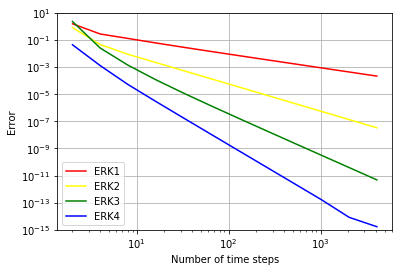

In [1]:
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt


def Main_Program():
    ERR = Simulation(4,12)
    Visualization(ERR,4,12)


def Simulation(order,power):
    # Initializing time-integration parameters.
    Y0 = np.array((1/3,1))
    n = len(Y0)
    dt = 3

    # Initializing Butcher-tableaus.
    A1 = np.array([[0]])
    b1 = np.array([1])
    A2 = np.array([[0,0],[1,0]])
    b2 = np.array([1,1])/2
    A3 = np.array([[0,0,0],[1/2,0,0],[-1,2,0]])
    b3 = np.array([1,4,1])/6
    A4 = np.array([[0,0,0,0],[1/2,0,0,0],[0,1/2,0,0],[0,0,1,0]])
    b4 = np.array([1,2,2,1])/6

    # Computing reference solution.
    YEX = Y0
    h = (0.1*dt)/2**power
    for i in range(0,10*2**power):
        YEX = ERK_step(A4,b4,h,4,2,YEX)

    # Computing numerical solution for 4 ERK-methods.
    ERR = np.zeros((order,power))
    for i in range(1,power+1):
        h = dt/2**i
        Y = np.outer(np.ones(4),Y0)
        for j in range(0,2**i):
            Y[0][:] = ERK_step(A1,b1,h,1,n,Y[0][:])
            Y[1][:] = ERK_step(A2,b2,h,2,n,Y[1][:])
            Y[2][:] = ERK_step(A3,b3,h,3,n,Y[2][:])
            Y[3][:] = ERK_step(A4,b4,h,4,n,Y[3][:])
        for j in range(0,order):
            ERR[j][i-1] = nl.norm(Y[j][:]-YEX)
    return ERR


def ERK_step(A,b,h,s,n,Y):
    # General implementation of the ERK-methods.
    K = np.zeros((n,s))
    K[:,0] = Lotka_Volterra(Y)
    for r in range(1,s):
        K[:,r] = Lotka_Volterra(Y+h*np.dot(K[:,0:r],A[r,0:r]))
    return Y+h*K.dot(b)


def Lotka_Volterra(Y):
    fu = Y[0]-2*Y[0]*Y[1]
    fv = -Y[1]+3*Y[0]*Y[1]
    return np.array([fu,fv])


def Visualization(E,order,power):
    X = np.zeros(power)
    for i in range(1,power+1):
        X[i-1] = 2**i
    COL = ['red','yellow','green','blue']
    fig,ax = plt.subplots()
    for i in range(0,order):
        ax.loglog(X,E[i],color=COL[i],label='ERK'+str(i+1))
    ax.set_ylim([10**-15,10**1])
    ax.set_xlabel('Number of time steps')
    ax.set_ylabel('Error')
    ax.legend()
    ax.grid()
    plt.show()


Main_Program()
